In [1]:
import numpy as np

from cifar_functions import *

X_train, X_test, Y_train, Y_test, sensitive, sensitive_t = data_train_test_cifar()

2024-02-26 17:05:52.171961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 17:05:52.172045: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 17:05:52.196270: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 17:05:52.245218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 17:05:53.086946: W tensorflow/compiler/tf2

In [8]:
import matplotlib.pyplot as plt

def plot_history(history, dist=None):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy ({"" if dist == None else dist*100}% old)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.tight_layout()

In [2]:
X_train.shape

(30000, 32, 32, 3)

In [3]:
Y_train.shape

TensorShape([30000, 10])

In [4]:
from common.functions import *

In [5]:
model, history = fit_lucasnet(X_train, Y_train, X_test, Y_test, verbose=1, input_shape=(32, 32, 3), num_classes=10)

Epoch 1/5


2024-02-26 17:06:09.354141: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 368640000 exceeds 10% of free system memory.


935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4253 - loss: 1.6644

2024-02-26 17:06:33.255240: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 368640000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.4256 - loss: 1.6632 - val_accuracy: 0.5999 - val_loss: 1.1248
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.6375 - loss: 1.0240 - val_accuracy: 0.6621 - val_loss: 0.9737
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7059 - loss: 0.8482 - val_accuracy: 0.6926 - val_loss: 0.8811
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7444 - loss: 0.7199 - val_accuracy: 0.7015 - val_loss: 0.8693
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.7885 - loss: 0.6177 - val_accuracy: 0.7178 - val_loss: 0.8290


(<Sequential name=sequential, built=True>,
 <keras.src.callbacks.history.History at 0x7f59b14a2e30>)

In [8]:
Y_train[3]

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [7]:
import keras

cifar100 = keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [8]:

y_train.shape

(50000, 1)

In [9]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [1]:
from cifar_functions import get_cifar_input_set

x, y = get_cifar_input_set()

2024-02-27 17:47:08.853590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 17:47:08.853718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 17:47:08.915711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 17:47:09.046325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 17:47:10.102645: W tensorflow/compiler/tf2

In [2]:
x.shape

(18000, 32, 32, 3)

In [3]:
y.shape

(18000, 1)

In [1]:
from cifar_functions import *
distributed_datasets = get_distributed_cifar_sets(distributions=[0.7,0.8,0.9])

2024-02-28 10:27:50.475194: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 10:27:50.475259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 10:27:50.477290: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 10:27:50.490027: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-28 10:27:51.354480: W tensorflow/compiler/tf2

now computing dist 0.7
now computing dist 0.8
now computing dist 0.9


In [2]:
for ds in distributed_datasets:
    print(ds.y_train.shape)

(17142, 10)
(15000, 10)
(13333, 10)


In [1]:
from cifar_functions import get_distributed_cifar_sets, get_cifar_input_set
from common.functions import train_shadow_models

2024-02-29 10:01:29.508875: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 10:01:29.571705: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 10:01:29.571745: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 10:01:29.571788: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 10:01:29.583407: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 10:01:29.584408: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
base_path = "cifar"  # for saving models and output data
test_run = True
n_shadow_models = 2
distributions = [0.1]#, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
save_models = False
input_shape = (32, 32, 3)
num_classes = 10
model_input = get_cifar_input_set()
distributed_datasets = get_distributed_cifar_sets(distributions=distributions)

now computing dist 0.1


In [4]:
from common.functions import generate_shadow_model_outputs
ds = distributed_datasets[0]
load_model_path = f"{base_path}/models/shadow_models/{str(ds.distribution)}/{'test' if test_run else 'train'}/"

save_model_path = None
outputs = generate_shadow_model_outputs(ds, model_input, load_model_path, save_model_path, n_shadow_models=n_shadow_models, use_test_data=test_run, input_shape=input_shape, num_classes=num_classes)


In [5]:
outputs.shape
#adv_df = pd.DataFrame(outputs)

(2, 16200)

# Adversary

In [1]:
import pandas as pd
from joblib import Parallel, delayed

def load_and_concat(dist):
    a = pd.read_csv(f"cifar/data/shadow_model_outputs/{dist}/train.csv")
    b = pd.read_csv(f"cifar_new/data/shadow_model_outputs/{dist}/train.csv")
    return pd.concat([a,b])

dists = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

all_train = Parallel(n_jobs=-1)(delayed(load_and_concat)(dist) for dist in dists)
adv_train = pd.concat(all_train)

adv_test = pd.concat(Parallel(n_jobs=-1)(delayed(pd.read_csv)(f"cifar_new_new/data/shadow_model_outputs/{dist}/test.csv") for dist in dists))

In [2]:
adv_y = adv_train["y"]
adv_X = adv_train.drop(columns=["y"])
adv_y_test = adv_test["y"]
adv_X_test = adv_test.drop(columns=["y"])

In [3]:
adv_X.shape

(2700, 45360)

In [4]:
adv_X_test.shape

(900, 45360)

In [11]:
import keras
from keras import regularizers

manual_adversary = keras.Sequential()
manual_adversary.add(keras.Input(shape=(adv_X.shape[1],)))
manual_adversary.add(keras.layers.Dense(8, activation='relu'))#, kernel_regularizer=regularizers.l2(0.01)))
#manual_adversary.add(keras.layers.Dropout(0.3))
manual_adversary.add(keras.layers.Dense(8, activation='relu'))#, kernel_regularizer=regularizers.l2(0.04)))
manual_adversary.add(keras.layers.Dense(1))
manual_adversary.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.R2Score()])



In [12]:
checkpoint_filepath = "cifar/models/manual_tuning_checkpoints/keras.weights.h5"

history = manual_adversary.fit(
    adv_X,
    adv_y,
    epochs=200,
    validation_data=(adv_X_test, adv_y_test),
    callbacks=[
        keras.callbacks.EarlyStopping('val_r2_score', mode='max', patience=20, verbose=1),
        keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=True,
            monitor='val_r2_score',
            mode='max',
            save_best_only=True)
    ])

Epoch 1/200


2024-03-13 08:32:25.903609: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 489888000 exceeds 10% of free system memory.


73/85 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0884 - r2_score: -0.3285

2024-03-13 08:32:31.187319: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 163296000 exceeds 10% of free system memory.


85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0813 - r2_score: -0.2218 - val_loss: 0.0267 - val_r2_score: 0.6047
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0104 - r2_score: 0.8473 - val_loss: 0.0273 - val_r2_score: 0.5966
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - r2_score: 0.9327 - val_loss: 0.0299 - val_r2_score: 0.5692
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - r2_score: 0.9671 - val_loss: 0.0294 - val_r2_score: 0.5751
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - r2_score: 0.9828 - val_loss: 0.0307 - val_r2_score: 0.5590
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2133e-04 - r2_score: 0.9906 - val_loss: 0.0311 - val_r2_score: 0.5521
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7321e-04 - r2_score: 0.9944 - val_loss: 0.0310 - val_r2_score: 0.5513
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4162e-04 - r2_score: 0.9963 - val_loss: 0.0316 - va

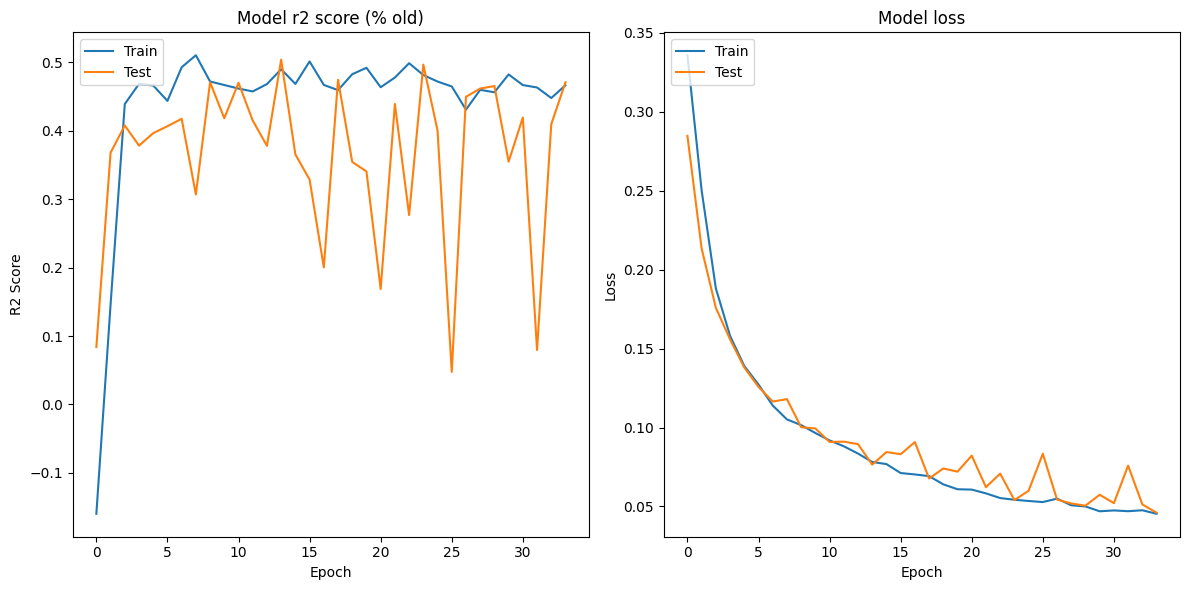

In [10]:
plot_history(history)

In [9]:
import matplotlib.pyplot as plt
def plot_history(history, dist=None):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['r2_score'][1:])
    plt.plot(history.history['val_r2_score'][1:])
    plt.title(f'Model r2 score ({"" if dist == None else dist*100}% old)')
    plt.ylabel('R2 Score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.tight_layout()

In [5]:
import keras_tuner
from tensorflow import keras
from keras_tuner.tuners import RandomSearch

2024-03-13 08:55:43.485370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 08:55:43.486715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 08:55:43.536194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 08:55:43.617277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 08:55:44.765050: W tensorflow/compiler/tf2

In [9]:
class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(keras.layers.Dense(hp.Int('units_dense0', min_value=24, max_value=40, step=4)))
        if hp.Boolean("relu_dense0"):
            model.add(keras.layers.Activation(keras.activations.relu))
        #model.add(keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.01, max_value=0.03, step=0.01)))
        model.add(keras.layers.Dense(hp.Int('units_dense1', min_value=6, max_value=14, step=2)))
        if hp.Boolean("relu_dense1"):
            model.add(keras.layers.Activation(keras.activations.relu))
        model.add(keras.layers.Dense(1))
        model.compile(optimizer="adam", loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.R2Score()])
        return model
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [10, 18, 24]),
            **kwargs,
        )


In [10]:
from keras_tuner import Objective
tuner = RandomSearch(
    MyHyperModel(),
    #objective=keras_tuner.Objective('val_r2_score', direction='max'),
    objective = Objective(name="val_r2_score", direction="max"),
    max_trials = 50,
    executions_per_trial = 4,
    tuner_id="17.01.regression.adversary.cgpt"
)

In [11]:
tuner.search(adv_X, adv_y, epochs=200, validation_data=(adv_X_test, adv_y_test), callbacks=[keras.callbacks.EarlyStopping('val_r2_score', mode='max', patience=20),])

Trial 50 Complete [00h 05m 06s]
val_r2_score: 0.4704882949590683

Best val_r2_score So Far: 0.6202707141637802
Total elapsed time: 04h 41m 16s


In [12]:
models = tuner.get_best_models(num_models=5)

/home/jstock/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:394: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [13]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_r2_score", direction="max")

Trial 10 summary
Hyperparameters:
units_dense0: 36
relu_dense0: True
units_dense1: 8
relu_dense1: True
batch_size: 24
Score: 0.6202707141637802

Trial 42 summary
Hyperparameters:
units_dense0: 28
relu_dense0: True
units_dense1: 10
relu_dense1: True
batch_size: 18
Score: 0.6037189066410065

Trial 29 summary
Hyperparameters:
units_dense0: 24
relu_dense0: False
units_dense1: 14
relu_dense1: True
batch_size: 18
Score: 0.5935608893632889

Trial 39 summary
Hyperparameters:
units_dense0: 32
relu_dense0: False
units_dense1: 14
relu_dense1: False
batch_size: 10
Score: 0.5910771191120148

Trial 48 summary
Hyperparameters:
units_dense0: 24
relu_dense0: False
units_dense1: 12
relu_dense1: True
batch_size: 10
Score: 0.5906173139810562

Trial 20 summary
Hyperparameters:
units_dense0: 40
relu_dense0: False
units_dense1: 12
relu_dense1: True
batch_size: 10
Score: 0.5887070596218109

Tr

In [14]:
best_model = models[0]

In [15]:
best_model.build(input_shape=(None,adv_X.shape[1],))

In [ ]:
best_model.save("cifar/models/cifar-adv_0.62_test_r2.keras")